# Univariate

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import synthia as syn

## Load sample data

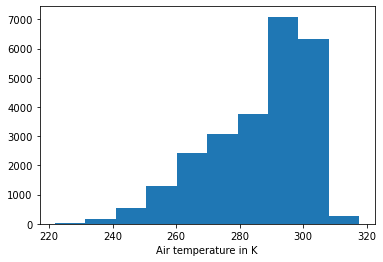

In [2]:
ds_true = syn.util.load_dataset(name='SAF-Synthetic')
# We only select one level as we are dealing with univariate data
ds_true = ds_true.sel(level=-1)
ds_true['temperature_fl'].plot.hist()
plt.xlabel('Air temperature in K');

## Fit and generate using samples

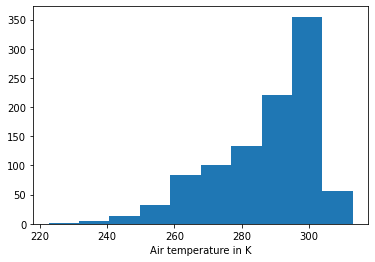

In [3]:
generator = syn.CopulaDataGenerator()
# We fit and store the original samples and use them to recontuct new synthetic samples. 
generator.fit(ds_true, copula=syn.IndependenceCopula())
N_SAMPLES = 1000
ds_synth_empirical = generator.generate(N_SAMPLES)
ds_synth_empirical['temperature_fl'].plot.hist()
plt.xlabel('Air temperature in K');

## Fit and generate using parametrized distribution

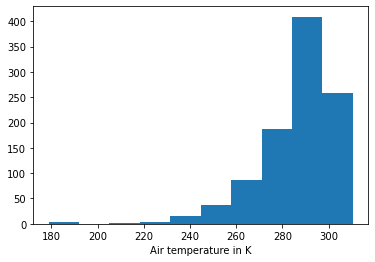

In [4]:
generator = syn.CopulaDataGenerator()
# We now fit a parametric distribution instead of using the original samples (it may take some time)
dist_names = set(syn.DistributionParameterizer.get_dist_names())
# Remove all very slow distributions
dist_names -= set(['genexpon', 'levy_stable', 'recipinvgauss', 'vonmises', 'ncx2',
                   'kstwo', 'ncf', 'tukeylambda', 'nct', 'skewnorm', 'norminvgauss',
                   'gausshyper', 'geninvgauss', 'studentized_range'])
generator.fit(ds_true, copula=syn.IndependenceCopula(), 
    parameterize_by=syn.DistributionParameterizer(dist_names, verbose=False))
ds_synth_param = generator.generate(1000)
ds_synth_param['temperature_fl'].plot.hist()
plt.xlabel('Air temperature in K');

## Stretching and unifomization

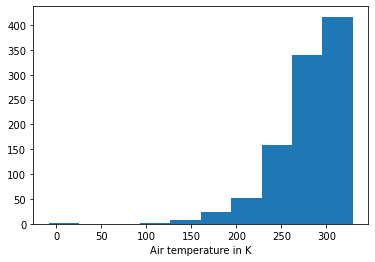

In [5]:
ds_synth_stretched = generator.generate(1000, stretch_factor=2)
ds_synth_stretched['temperature_fl'].plot.hist()
plt.xlabel('Air temperature in K');

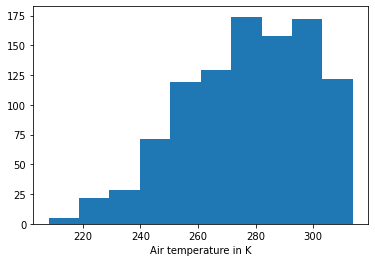

In [6]:
ds_synth_uniformization = generator.generate(1000, uniformization_ratio=0.5)
ds_synth_uniformization['temperature_fl'].plot.hist()
plt.xlabel('Air temperature in K');

## Exporting and saving generated data

In [7]:
# As the original xarray structured is mainted we can convert or save the data in any of xarray's supoorted formats
ds_synth_param.to_dataframe()

,temperature_fl
column,
0,302.163574
1,291.881622
2,293.075470
3,299.407440
4,263.578949
...,...
995,294.080078
996,290.117401
997,272.338257


In [8]:
# Or saving as a netCDF file
ds_synth_param.to_netcdf('ds_synth_param.nc')

## Saving the generator

In [9]:
# Alternatively we can store the generator object into a pickle object, that we can later reload
import pickle
pickled = pickle.dumps(generator)
generator = pickle.loads(pickled)

In [10]:
# Or to a file
with open('generator.pkl', 'wb') as f:
    pickle.dump(generator, f)
    
with open('generator.pkl', 'rb') as f:
    generator = pickle.load(f)